In [1]:
from keras.layers import MaxPooling2D, Activation, Convolution2D
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray

%matplotlib inline

Using TensorFlow backend.


In [2]:
!git clone https://github.com/niazwazir/TestImage.git

Cloning into 'TestImage'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [3]:
!ls

sample_data  TestImage


In [4]:
cd TestImage

/content/TestImage


In [5]:
!ls

baby_GT.bmp  bird_GT.bmp  butterfly_GT.bmp  cat.png  head_GT.bmp  woman_GT.bmp


## Lets see the image!

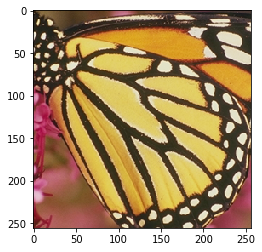

In [20]:
cat1 = cv2.imread("butterfly_GT.bmp")
cat=cv2.cvtColor(cat1, cv2.COLOR_BGR2RGB)
plt.imshow(cat)
mpl.rcParams['axes.grid'] = False
plt.show()

In [21]:
# what does the image look like?
cat.shape

(256, 256, 3)

## Lets create a model with 1 Convolutional layer

In [0]:
# here we get rid of that added dimension and plot the image
def visualize_cat(model, cat):
    # Keras expects batches of images, so we have to add a dimension to trick it into being nice
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat = model.predict(cat_batch)
    conv_cat = np.squeeze(conv_cat, axis=0)
    print(conv_cat.shape)
    plt.imshow(conv_cat)


## 10x10 Kernel ConvCat

## Cat with 1 filter

In [0]:
# Note: matplot lib is pretty inconsistent with how it plots these weird cat arrays.
# Try running them a couple of times if the output doesn't quite match the blog post results.
def nice_cat_printer(model, cat):
    '''prints the cat as a 2d array'''
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat2 = model.predict(cat_batch)

    conv_cat2 = np.squeeze(conv_cat2, axis=0)
    print(conv_cat2.shape)
    conv_cat2 = conv_cat2.reshape(conv_cat2.shape[:2])

    print(conv_cat2.shape)
    plt.imshow(conv_cat2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(256, 256,...)`
  """


(254, 254, 1)
(254, 254)


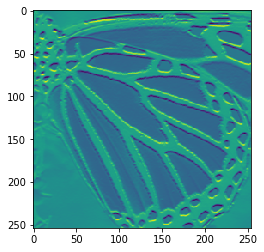

In [35]:
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))

# Keras expects batches of images, so we have to add a dimension to trick it into being nice
nice_cat_printer(model, cat)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (15, 15), input_shape=(256, 256,...)`
  """


(242, 242, 1)
(242, 242)


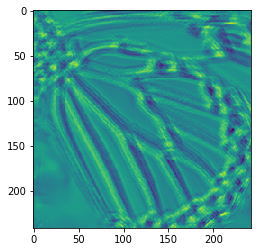

In [36]:
# 15x15 kernel size
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        15,    # y dimension of kernel (we're going for a 3x3 kernel)
                        15,    # x dimension of kernel
                        input_shape=cat.shape))

nice_cat_printer(model, cat)

## Lets add a relu activation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(256, 256,...)`
  """


(254, 254, 1)
(254, 254)


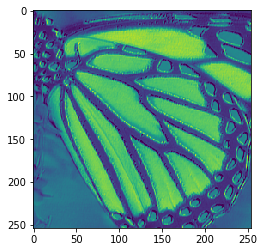

In [37]:
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))

nice_cat_printer(model, cat)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(256, 256,...)`
  """
W0802 16:44:33.248675 140002940024704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(254, 254, 3)


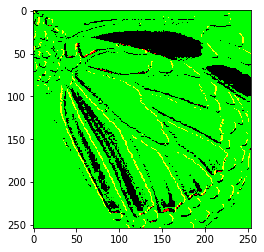

In [38]:
model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))

visualize_cat(model, cat)

## Max Pooling

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(256, 256,...)`
  """


(50, 50, 1)
(50, 50)


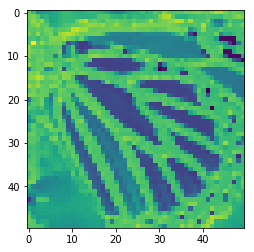

In [39]:
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets add a new max pooling layer!
model.add(MaxPooling2D(pool_size=(5,5)))

nice_cat_printer(model, cat)

## Activation then pooling

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(256, 256,...)`
  """


(50, 50, 1)
(50, 50)


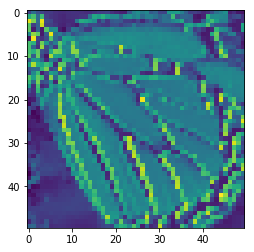

In [40]:
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

nice_cat_printer(model, cat)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(256, 256,...)`
  """
W0802 16:44:35.033824 140002940024704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(50, 50, 3)


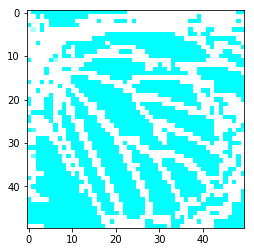

In [41]:
model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

visualize_cat(model, cat)

## Cat after the convolutional and pooling stages of LeNet

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(256, 256,...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(256, 256,...)`
  if sys.path[0] == '':


(27, 27, 1)
(27, 27)


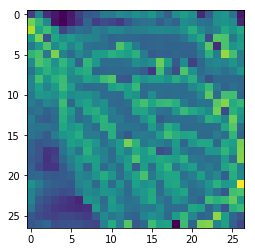

In [42]:
# 1 filter in each conv layer for pretty printing
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

nice_cat_printer(model, cat)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(256, 256,...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(256, 256,...)`
  if sys.path[0] == '':


(41, 41, 1)
(41, 41)


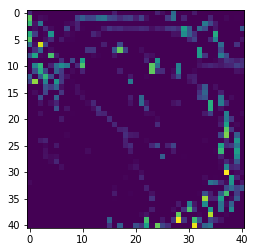

In [43]:
# 3 filters in conv1, then 1 filter for pretty printing
model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

nice_cat_printer(model, cat)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(256, 256,...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(256, 256,...)`
  if sys.path[0] == '':
W0802 16:44:36.843848 140002940024704 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(41, 41, 3)


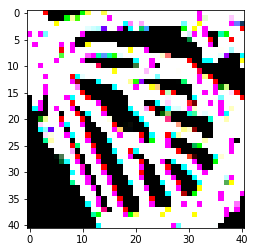

In [44]:
# 3 filters in both conv layers
model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

visualize_cat(model, cat)